In [99]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "Forest Fire.webp")

# Data Set Information:

The dataset includes 244 instances that regroup a data of two regions of Algeria, namely the Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria.

* 122 instances for each region.

* The period from June 2012 to September 2012.
* The dataset includes 11 attribues and 1 output attribue (class)
* The 244 instances have been classified into Fire (138 classes) and Not Fire (106 classes) classes.

Attribute Information:

1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)

* Weather data observations
2. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
3. RH : Relative Humidity in %: 21 to 90
4. Ws :Wind speed in km/h: 6 to 29
5. Rain: total day in mm: 0 to 16.8

* FWI Components
6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
8. Drought Code (DC) index from the FWI system: 7 to 220.4
9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
11. Fire Weather Index (FWI) Index: 0 to 31.1
12. Classes: two classes, namely Fire and Not Fire

In [100]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_theme(style="whitegrid")

In [101]:
df = pd.read_csv('C:/Users/abhi/Downloads/Algerian Dataset/Algerian_forest_fires_dataset_for_classification.csv', header=0)

In [102]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire


In [103]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   year         244 non-null    int64  
 3   Temperature  244 non-null    int64  
 4    RH          244 non-null    int64  
 5    Ws          244 non-null    int64  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    float64
 13  Classes      243 non-null    object 
dtypes: float64(7), int64(6), object(1)
memory usage: 26.8+ KB


In [105]:
for col in df.columns:
  print(df[col].unique())
  print()

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]

[6 7 8 9]

[2012]

[29 26 25 27 31 33 30 28 32 34 35 36 37 22 24 38 39 40 42]

[57 61 82 89 77 67 54 73 88 79 65 81 84 78 80 55 62 66 64 53 47 50 68 75
 76 63 69 70 59 48 45 60 51 52 58 86 74 71 49 44 41 42 90 87 72 46 37 36
 56 43 83 29 34 33 35 39 31 21 40 24 38 26]

[18 13 22 16 14 15 12 19 21 20 17 26 11 10  9  8  6 29]

[ 0.   1.3 13.1  2.5  0.2  1.2  0.5  3.1  0.7  0.6  0.3  0.1  0.4  1.
  1.4  0.8 16.8  7.2 10.1  3.8  0.9  1.8  4.6  8.3  5.8  4.   2.   4.7
  8.7  4.5  1.1  1.7  2.2  6.   1.9  2.9  4.1  6.5  4.4]

[65.7 64.4 47.1 28.6 64.8 82.6 88.2 86.6 52.9 73.2 84.5 84.  50.  59.
 49.4 36.1 37.3 56.9 79.9 59.8 81.  79.1 81.4 85.9 86.7 86.8 89.  89.1
 88.7 59.9 55.7 63.1 80.1 87.  80.  85.6 66.6 81.1 75.1 81.8 73.9 60.7
 72.6 82.8 85.4 88.1 73.4 68.2 70.  84.3 89.2 90.3 86.5 87.2 78.8 78.
 76.6 85.  86.4 77.1 87.4 88.9 81.3 82.4 80.2 89.3 89.4 88.3 88.6 89.5
 85.8 84.9 90.1 72.7 52.

Since year do not have any effect/singficance on forest fire/temperature so we can safely remove it.

In [106]:
df.drop('year', axis=1, inplace=True)

WE can see clearly classes column have some noise, we have to get rid off that noise

In [107]:
df['Classes  '].replace('nan', df['Classes  '].mode)

0       not fire   
1       not fire   
2       not fire   
3       not fire   
4       not fire   
           ...     
239         fire   
240     not fire   
241     not fire   
242     not fire   
243    not fire    
Name: Classes  , Length: 244, dtype: object

In [108]:
def signal(x):
    if x in ['not fire   ','not fire','not fire ', 'not fire     ','nan', 'not fire    ']:
        return 0
    else:
        return 1

In [109]:
df['Classes  ']=df['Classes  '].map(signal)

In [110]:
df['Classes  '].unique()

array([0, 1], dtype=int64)

In [111]:
df.columns

Index(['day', 'month', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC', 'DMC',
       'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')

** Now our classes are 0 and 1
1. 0 => No Fire
2. 1 => Fire is there

 Renaming columns, since they have some extra spaces

In [112]:
df.rename({' RH':'RH',' Ws':'WS','Rain ':'Rain', 'Classes  ':'Classes' }, axis=1, inplace=True)

In [113]:
df.columns

Index(['day', 'month', 'Temperature', 'RH', 'WS', 'Rain', 'FFMC', 'DMC', 'DC',
       'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

In [114]:
#df['FWI'].astype('float64')

In [115]:
#df.astype(np.int64).dtypes

In [116]:
df.describe()

,day,month,Temperature,RH,WS,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
count,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,15.754098,7.500000,32.172131,61.938525,15.504098,0.760656,77.887705,14.673361,49.288115,4.774180,16.664754,7.049590,0.565574
std,8.825059,1.112961,3.633843,14.884200,2.810178,1.999406,14.337571,12.368039,47.619662,4.175318,14.204824,7.428554,0.496700
min,1.000000,6.000000,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,30.000000,52.000000,14.000000,0.000000,72.075000,5.800000,13.275000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,7.500000,32.000000,63.000000,15.000000,0.000000,83.500000,11.300000,33.100000,3.500000,12.250000,4.450000,1.000000
75%,23.000000,8.000000,35.000000,73.250000,17.000000,0.500000,88.300000,20.750000,68.150000,7.300000,22.525000,11.375000,1.000000
max,31.000000,9.000000,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


In [117]:
# Checking missing values
df.isnull().sum()     #or df.isna().sum()

day            0
month          0
Temperature    0
RH             0
WS             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
dtype: int64

In [118]:
# having a look at correlation
df.corr()

,day,month,Temperature,RH,WS,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
day,1.000000e+00,2.232788e-17,0.095772,-0.074209,0.047001,-0.112265,0.224032,0.491571,0.527929,0.177727,0.517229,0.350214,0.201784
month,2.232788e-17,1.000000e+00,-0.059017,-0.037884,-0.041447,0.035322,0.015577,0.068178,0.127672,0.061680,0.085822,0.081705,0.022333
Temperature,9.577222e-02,-5.901677e-02,1.000000,-0.654443,-0.278132,-0.326786,0.677491,0.483105,0.370498,0.607551,0.455504,0.566898,0.518119
RH,-7.420934e-02,-3.788419e-02,-0.654443,1.000000,0.236084,0.222968,-0.645658,-0.405133,-0.220330,-0.690637,-0.348587,-0.580536,-0.435023
WS,4.700086e-02,-4.144673e-02,-0.278132,0.236084,1.000000,0.170169,-0.163255,-0.001246,0.076245,0.015248,0.029756,0.034005,-0.066529
Rain,-1.122654e-01,3.532207e-02,-0.326786,0.222968,0.170169,1.000000,-0.544045,-0.288548,-0.296804,-0.347105,-0.299171,-0.324762,-0.379449
FFMC,2.240321e-01,1.557668e-02,0.677491,-0.645658,-0.163255,-0.544045,1.000000,0.602391,0.503910,0.739730,0.589652,0.691455,0.770114
DMC,4.915710e-01,6.817778e-02,0.483105,-0.405133,-0.001246,-0.288548,0.602391,1.000000,0.875358,0.674499,0.982073,0.875161,0.584188
DC,5.279285e-01,1.276719e-01,0.370498,-0.220330,0.076245,-0.296804,0.503910,0.875358,1.000000,0.498909,0.941904,0.736982,0.507122
ISI,1.777266e-01,6.168011e-02,0.607551,-0.690637,0.015248,-0.347105,0.739730,0.674499,0.498909,1.000000,0.635891,0.919486,0.735511


In [119]:
#sns.pairplot(df)

<AxesSubplot: >

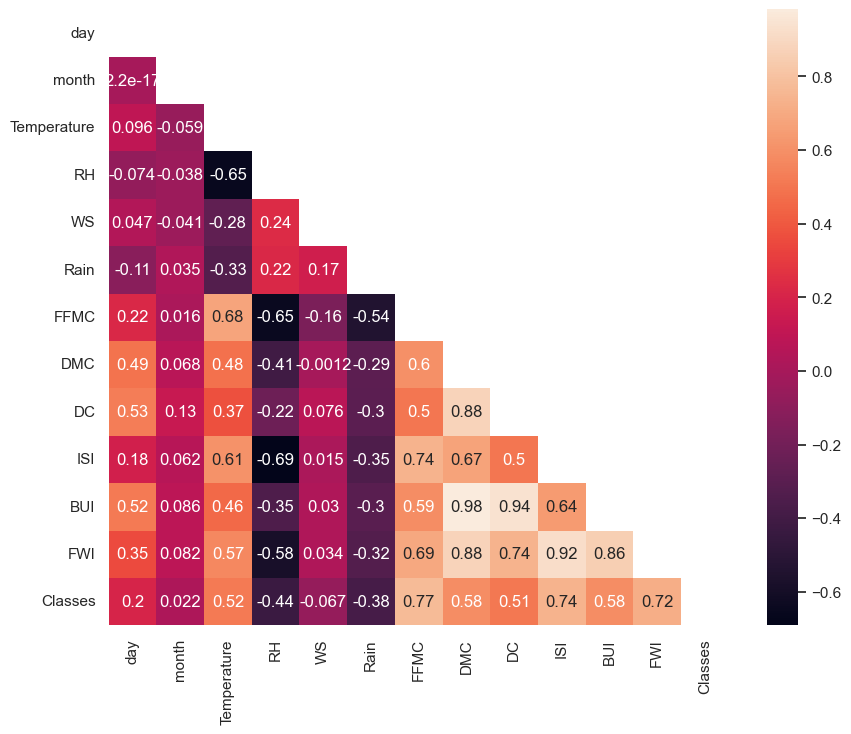

In [120]:
corr= df.corr()

# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(corr)

# using the upper triangle matrix as mask 
sns.heatmap(corr, annot=True, mask=matrix)

* We can see, temperature has significant negative correlation with RH and positive correlation with FFMC, DMC, ISI, BUI and FWI
* FWi seems to be interdipendent with DMC, ISI and BUI. Same is the case with BUI with DMC and DC (0.98 0.94 respectively) so we can exclude BUI

In [121]:
# Checking data balance
df['Classes'].value_counts()

1    138
0    106
Name: Classes, dtype: int64

This is balance data

<AxesSubplot: xlabel='Classes', ylabel='count'>

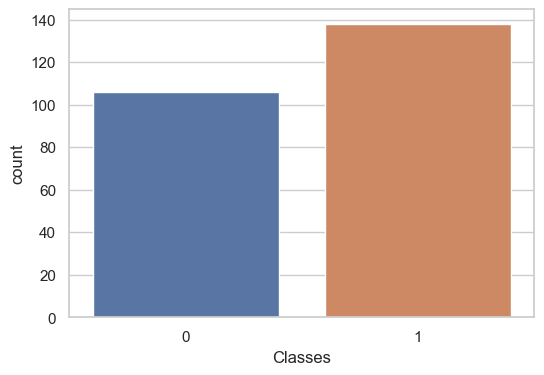

In [122]:
plt.figure(figsize=(6,4))
sns.countplot(x=df['Classes'])

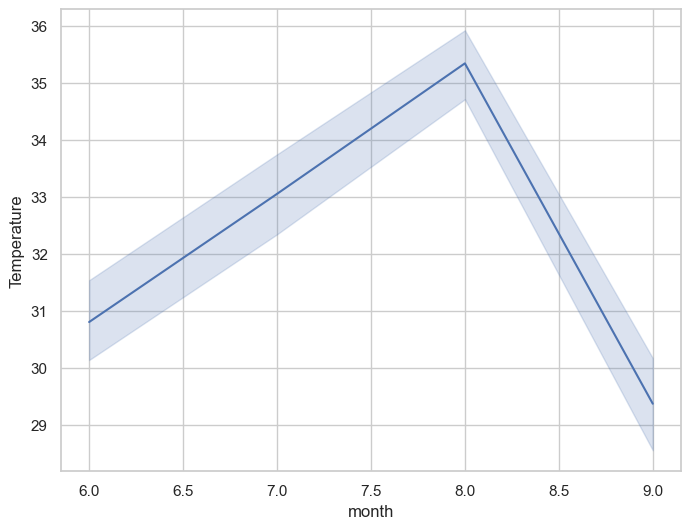

In [123]:
plt.figure(figsize=(8,6))
sns.lineplot(x=df['month'], y=df['Temperature'])
plt.xlabel('month')
plt.ylabel('Temperature')
plt.show()

From this we can see maximum temperature goes more than 35 degree in 8th month and minimum in the 9th month. So in the 8th month forest fire can be observed more frequently than ohter month.

Text(0, 0.5, 'Temperature')

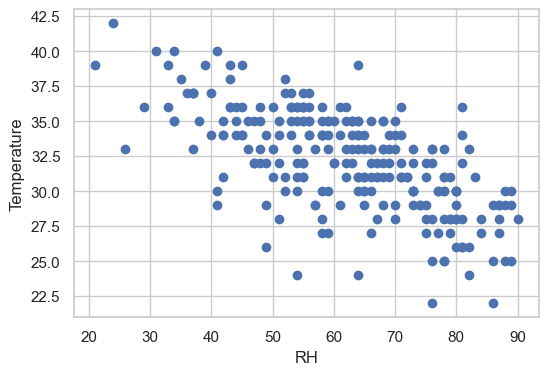

In [124]:
plt.figure(figsize=(6,4))
plt.scatter(df['RH'], df['Temperature'])
plt.xlabel('RH')
plt.ylabel('Temperature')

In [125]:
df.columns

Index(['day', 'month', 'Temperature', 'RH', 'WS', 'Rain', 'FFMC', 'DMC', 'DC',
       'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

We can see there is a negative correlation between RH and Temperature

<AxesSubplot: >

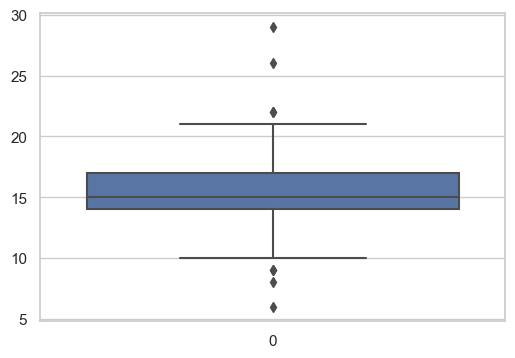

In [126]:
plt.figure(figsize=(6,4))
sns.boxplot(df['WS'])   

<AxesSubplot: >

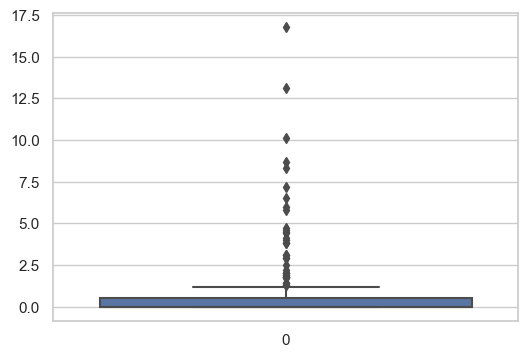

In [127]:
plt.figure(figsize=(6,4))
sns.boxplot(df['Rain'])

<AxesSubplot: >

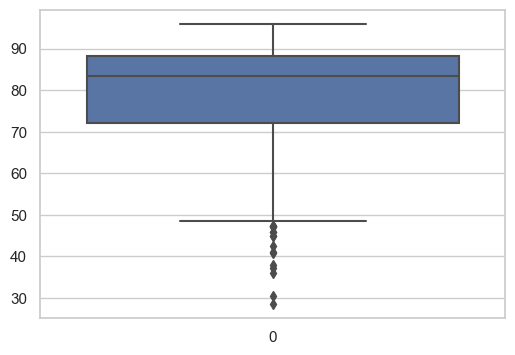

In [128]:
plt.figure(figsize=(6,4))
sns.boxplot(df['FFMC'])

<AxesSubplot: >

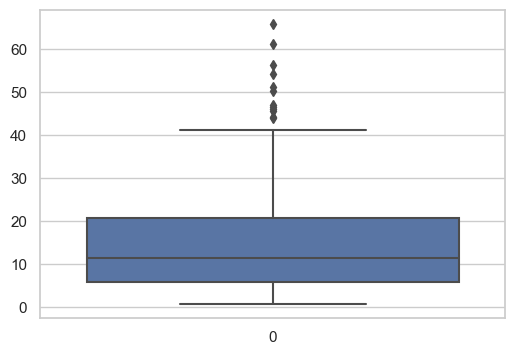

In [129]:
plt.figure(figsize=(6,4))
sns.boxplot(df['DMC'])

<AxesSubplot: xlabel='month', ylabel='count'>

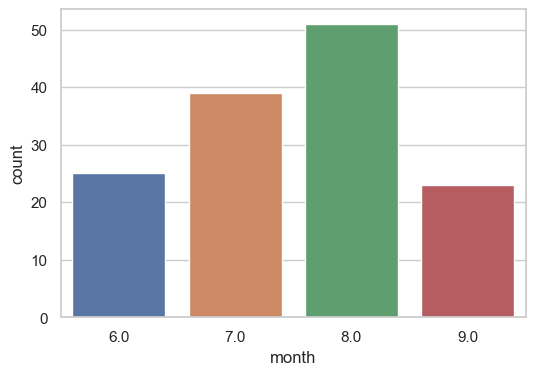

In [130]:
plt.figure(figsize=(6,4))
sns.countplot(data=df.where(df['Classes']==1), x="month")

August (8th month) has maximum number of fire followed by July (7th month) which is also supported by the fact that august experience maximum temperature rise.

In [131]:
# Independent and Dependent features
X = df.drop('Classes', axis=1)  
y = df['Classes'] # or y=dataset.iloc[:,-1]

In [132]:
from sklearn.model_selection import train_test_split

In [133]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=12)

In [134]:
X_train.shape

(163, 12)

In [135]:
y_train.shape

(163,)

In [136]:
X_test.shape

(81, 12)

In [137]:
y_test.shape

(81,)

In [138]:
# standardize and feature scaling the datasets
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [139]:
scaler

StandardScaler()

In [140]:
X_train

,day,month,Temperature,RH,WS,Rain,FFMC,DMC,DC,ISI,BUI,FWI
126,5,6,32,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0.9
47,18,7,31,68,14,0.0,85.4,12.1,43.1,4.6,14.2,6.0
62,2,8,35,55,12,0.4,78.0,5.8,10.0,1.7,5.5,0.8
139,18,6,33,62,10,8.7,65.5,4.6,8.3,0.9,4.4,0.4
233,20,9,34,58,13,0.2,79.5,18.7,88.0,2.1,24.4,3.8
...,...,...,...,...,...,...,...,...,...,...,...,...
3,4,6,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0
130,9,6,27,59,18,0.1,78.1,8.5,14.7,2.4,8.3,1.9
134,13,6,30,52,15,2.0,72.3,11.4,7.8,1.4,10.9,0.9
155,4,7,34,58,18,0.0,88.0,13.6,36.8,8.0,14.1,9.9


In [141]:
#X_train.replace('14.6 9',14.6)

In [142]:
X_train = scaler.fit_transform(X_train)

In [143]:
X_test = scaler.transform(X_test)   
# To avoid data leakage we apply only transform on test data
# we are using same mu and sigma, which is calculated on training data

In [144]:
#X_test

# Model Training 

In [145]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [146]:
lr.fit(X_train, y_train)

LogisticRegression()

In [147]:
# print the coefficients and intercepts
print(lr.coef_)

[[-0.13730353  0.0390668   0.21007966  0.01119816  0.21614154 -0.38627924
   2.13197253 -0.35791683  0.11393209  2.23446326  0.25268494  1.87420464]]


In [148]:
print(lr.intercept_)

[1.10917207]


In [149]:
# Prediction for test data
y_pred =lr.predict(X_test)

In [150]:
y_pred

array([0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0], dtype=int64)

# Performance Metrics

In [151]:
from sklearn.metrics import confusion_matrix, precision_score, f1_score, recall_score

In [152]:
confusion_matrix(y_test, y_pred)

array([[31,  1],
       [ 1, 48]], dtype=int64)

Since our objective to prevent forest fire, so our main focus is to reduce false negative (fire is there but model predicted fire is not there). Hence, we select recall as performance matrix

In [153]:
f1_score(y_test, y_pred)

0.9795918367346939

In [154]:
recall_score(y_test, y_pred)

0.9795918367346939